In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
import os
import pandas as pd
from dw_events.temperature_compensation.savgol_filter import SavgolTempComp
from dw_events.data.make_dataset import DataGetter
from dw_events.data.utils import make_dt_list, get_dataframe_str_subset
import datetime
import matplotlib.pyplot as plt

In [3]:
start = datetime.datetime(2022, 9, 1)
end = datetime.datetime(2022, 9, 2)
datagetter = DataGetter(start, end)
strain_data = datagetter.get_strain_data()

In [4]:
# Get strain line data BCN
BCN_signals = datagetter.get_dataframe_str_subset('BCN')

In [5]:
window = 1200
polyorder = 1
savgol_filter = SavgolTempComp(BCN_signals, window, polyorder)
sensor_nr = 3

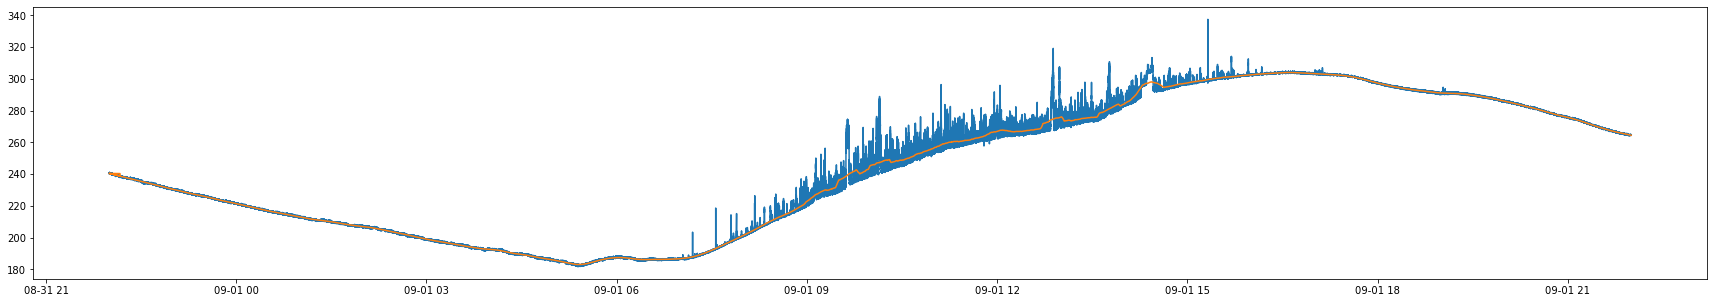

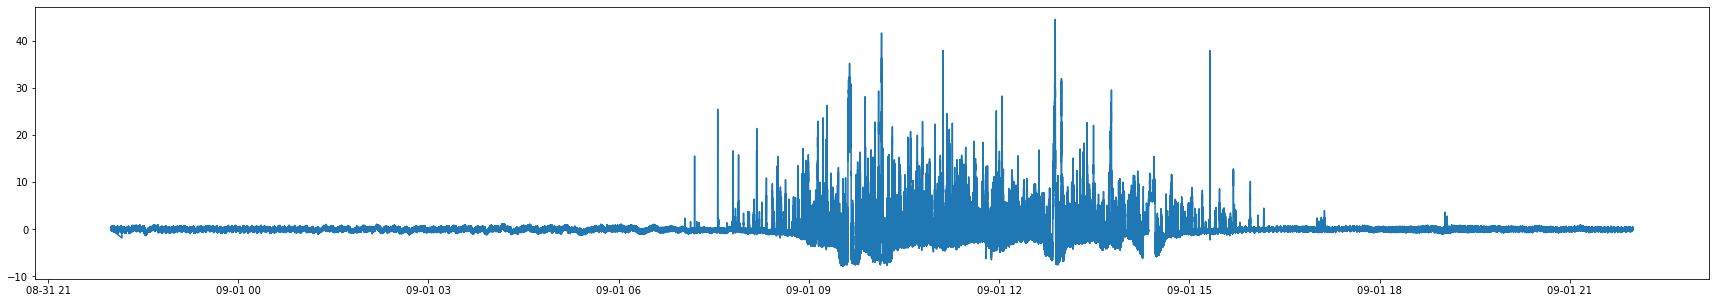

In [6]:
filtered_data = savgol_filter.filter_data()
compensated_data = savgol_filter.apply_filter()
plt.figure(figsize=(30,5))
plt.plot(BCN_signals.iloc[:,sensor_nr])
plt.plot(filtered_data.iloc[:,sensor_nr])
plt.show()
plt.figure(figsize=(30,5))
plt.plot(BCN_signals.iloc[:,sensor_nr] - filtered_data.iloc[:,sensor_nr])
plt.show()

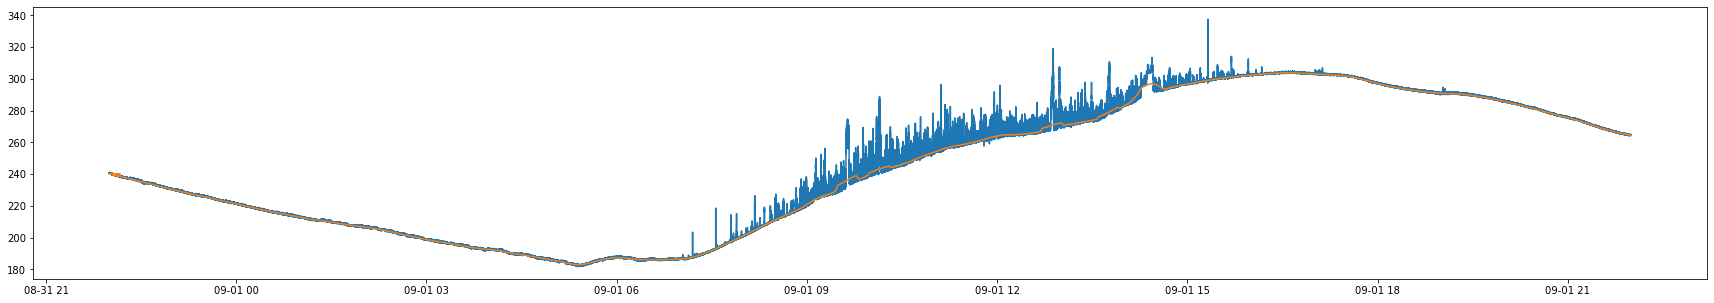

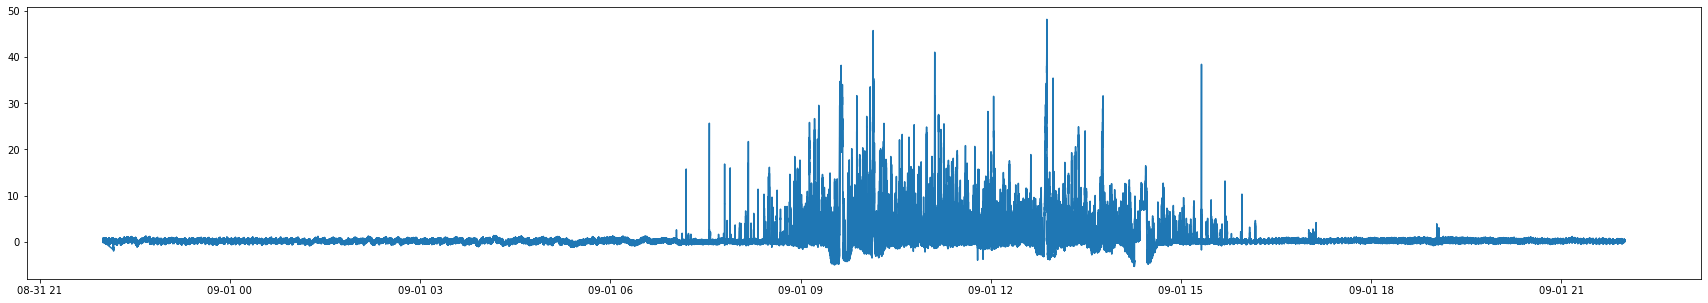

In [7]:
filtered_data = savgol_filter.filter_data(min_max='min')
compensated_data = savgol_filter.apply_filter(min_max='min')
plt.figure(figsize=(30,5))
plt.plot(BCN_signals.iloc[:,sensor_nr])
plt.plot(filtered_data.iloc[:,sensor_nr])
plt.show()
plt.figure(figsize=(30,5))
plt.plot(BCN_signals.iloc[:,sensor_nr] - filtered_data.iloc[:,sensor_nr])
plt.show()

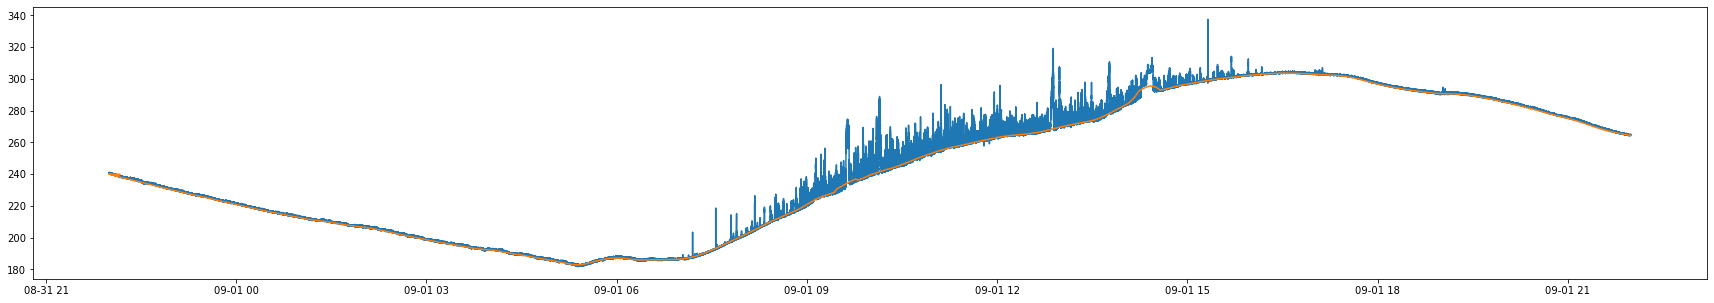

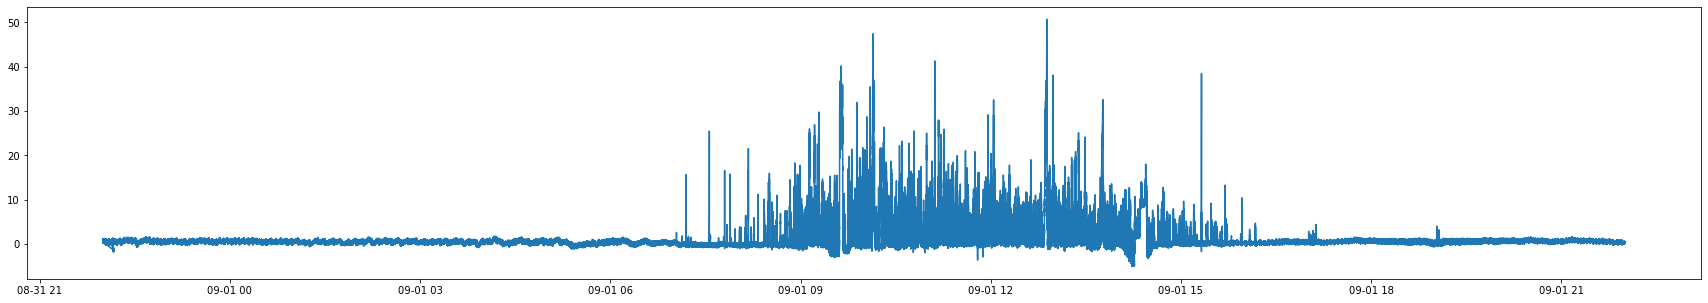

In [8]:
filtered_data = savgol_filter.filter_data(min_max='min', min_max_freq=120)
compensated_data = savgol_filter.apply_filter(min_max='min', min_max_freq=120)
plt.figure(figsize=(30,5))
plt.plot(BCN_signals.iloc[:,sensor_nr])
plt.plot(filtered_data.iloc[:,sensor_nr])
plt.show()
plt.figure(figsize=(30,5))
plt.plot(BCN_signals.iloc[:,sensor_nr] - filtered_data.iloc[:,sensor_nr])
plt.show()

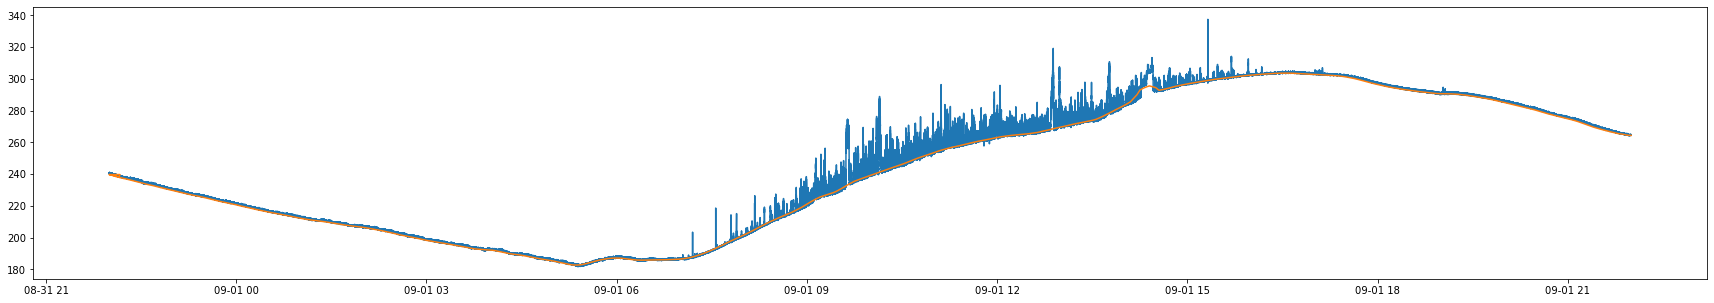

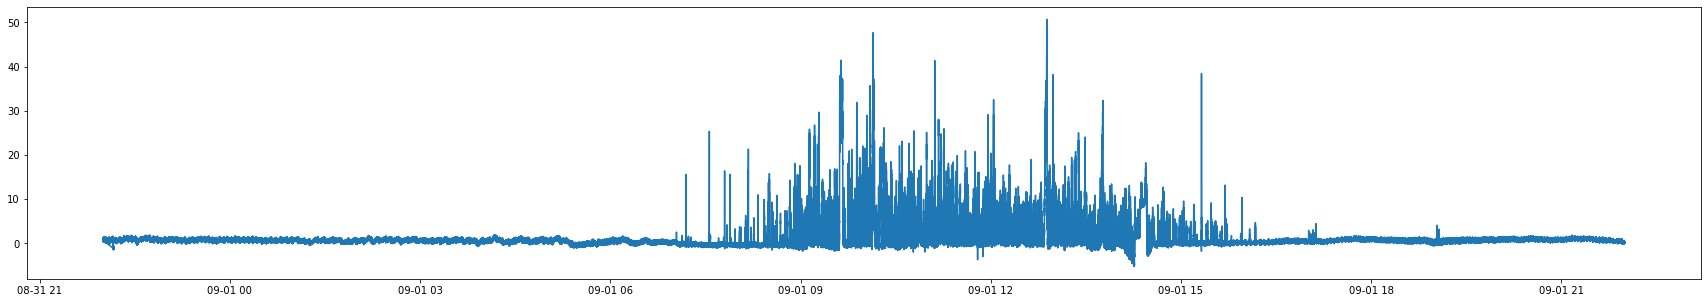

In [9]:
filtered_data = savgol_filter.filter_data(min_max='min', min_max_freq=180)
compensated_data = savgol_filter.apply_filter(min_max='min', min_max_freq=180)
plt.figure(figsize=(30,5))
plt.plot(BCN_signals.iloc[:,sensor_nr])
plt.plot(filtered_data.iloc[:,sensor_nr])
plt.show()
plt.figure(figsize=(30,5))
plt.plot(BCN_signals.iloc[:,sensor_nr] - filtered_data.iloc[:,sensor_nr])
plt.show()